In [1]:
#Importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, OneHotEncoder

In [2]:
df = pd.read_csv("C:/Users/anjum/Desktop/Workshop from Home/taskdata.csv") #Reading CSV as a DataFrame

In [3]:
df.head()  #Printing first few rows

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,410039,496.0,8,1.500000,14,0.0,0.0,3.666667,66.666667,0,300.0,79.333333,15.250000,32.416667,27.916667,0.250000,0
1,410240,499.0,37,8.200000,10,0.0,0.0,4.900000,114.000000,0,0.0,232.100000,18.300000,16.200000,13.800000,0.000000,0
2,411764,493.0,9,1.533333,15,0.0,0.0,5.333333,106.666667,0,150.0,55.083333,3.750000,20.250000,24.500000,0.000000,0
3,411985,262.0,1,1.000000,14,0.0,0.0,6.307692,176.153846,0,1481.0,409.538462,80.769231,87.461538,57.615385,0.000000,1
4,412071,496.0,1,1.000000,18,0.0,0.0,5.846154,109.230769,0,41.5,48.230769,1.692308,17.461538,25.769231,0.230769,0


In [4]:
df.describe() #Show details about columns

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
count,4.407000e+03,4400.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000
mean,4.106655e+09,506.553864,22.335602,7.171576,9.874064,194.130365,16.942615,3.249388,72.119006,0.497844,338.851046,98.922260,16.812003,25.681004,27.622151,0.162009,0.103245
std,6.794948e+09,326.072756,43.591246,19.209092,5.169639,1548.361547,128.268824,5.509869,117.019515,1.199725,831.746150,297.692950,68.045904,55.324218,61.069006,0.517693,0.304313
min,4.100390e+05,111.000000,1.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.184510e+08,226.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.142857,2.727273,0.000000,0.000000,13.500000,2.500000,4.461538,4.384615,0.000000,0.000000
50%,7.296626e+08,493.000000,2.000000,1.076923,12.000000,0.000000,0.000000,2.000000,45.000000,0.000000,40.000000,40.000000,6.333333,12.266667,12.933333,0.000000,0.000000
75%,7.292936e+09,1005.000000,30.000000,5.666667,14.000000,0.000000,0.000000,4.333333,100.000000,0.000000,327.280000,101.291667,14.250000,28.000000,30.784615,0.153846,0.000000
max,7.356031e+10,1017.000000,354.000000,354.000000,24.000000,43957.172700,3852.727273,156.583333,3357.500000,5.000000,15606.500000,9183.866667,2606.000000,1716.400000,1743.266667,14.636364,1.000000


In [5]:
df = pd.DataFrame(df) # Converting to an DataFrame

In [6]:
print(df.info()) #Printing columns information (types, contain null and count)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4407 entries, 0 to 4406
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                4407 non-null   int64  
 1   account_id             4400 non-null   float64
 2   max_return_days        4407 non-null   int64  
 3   average_return_days    4407 non-null   float64
 4   customer_since_months  4407 non-null   int64  
 5   total_revenue          4407 non-null   float64
 6   average_revenue        4407 non-null   float64
 7   avg_vas_count          4407 non-null   float64
 8   avg_used_vas_value     4407 non-null   float64
 9   business_type          4407 non-null   int64  
 10  avg_wallet_bonus       4407 non-null   float64
 11  avg_active_ads         4407 non-null   float64
 12  avg_new_ads            4407 non-null   float64
 13  avg_email_replies      4407 non-null   float64
 14  avg_call_replies       4407 non-null   float64
 15  avg_

In [7]:
df.isnull().sum() # check for any Missing values

user_id                  0
account_id               7
max_return_days          0
average_return_days      0
customer_since_months    0
total_revenue            0
average_revenue          0
avg_vas_count            0
avg_used_vas_value       0
business_type            0
avg_wallet_bonus         0
avg_active_ads           0
avg_new_ads              0
avg_email_replies        0
avg_call_replies         0
avg_sms_replies          0
target                   0
dtype: int64

In [8]:
task = df.drop('user_id',axis=1)
task = task.drop('account_id',axis=1)
# Drop column user_id and account_id and save it in a new dataframe called task

In [9]:
X = task.drop('target', axis = 1)
Y = task['target']
# Predictors and Target

In [10]:
cor = X.corr()
#Checking for Collinearity Between Features and Creating Reducing Feature Size

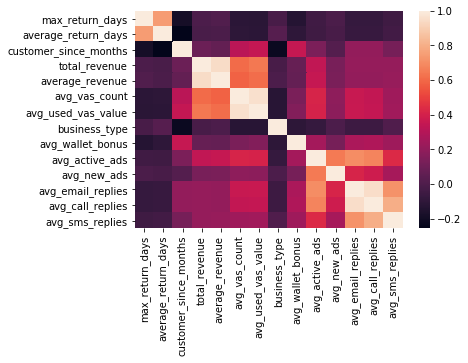

In [11]:
sns.heatmap(cor, xticklabels=cor.columns,yticklabels=cor.columns)


In [12]:
X = X.drop('total_revenue',axis=1)


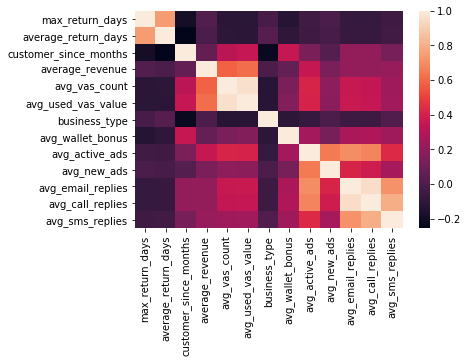

In [13]:
cor = X.corr()
sns.heatmap(cor, xticklabels=cor.columns,yticklabels=cor.columns)


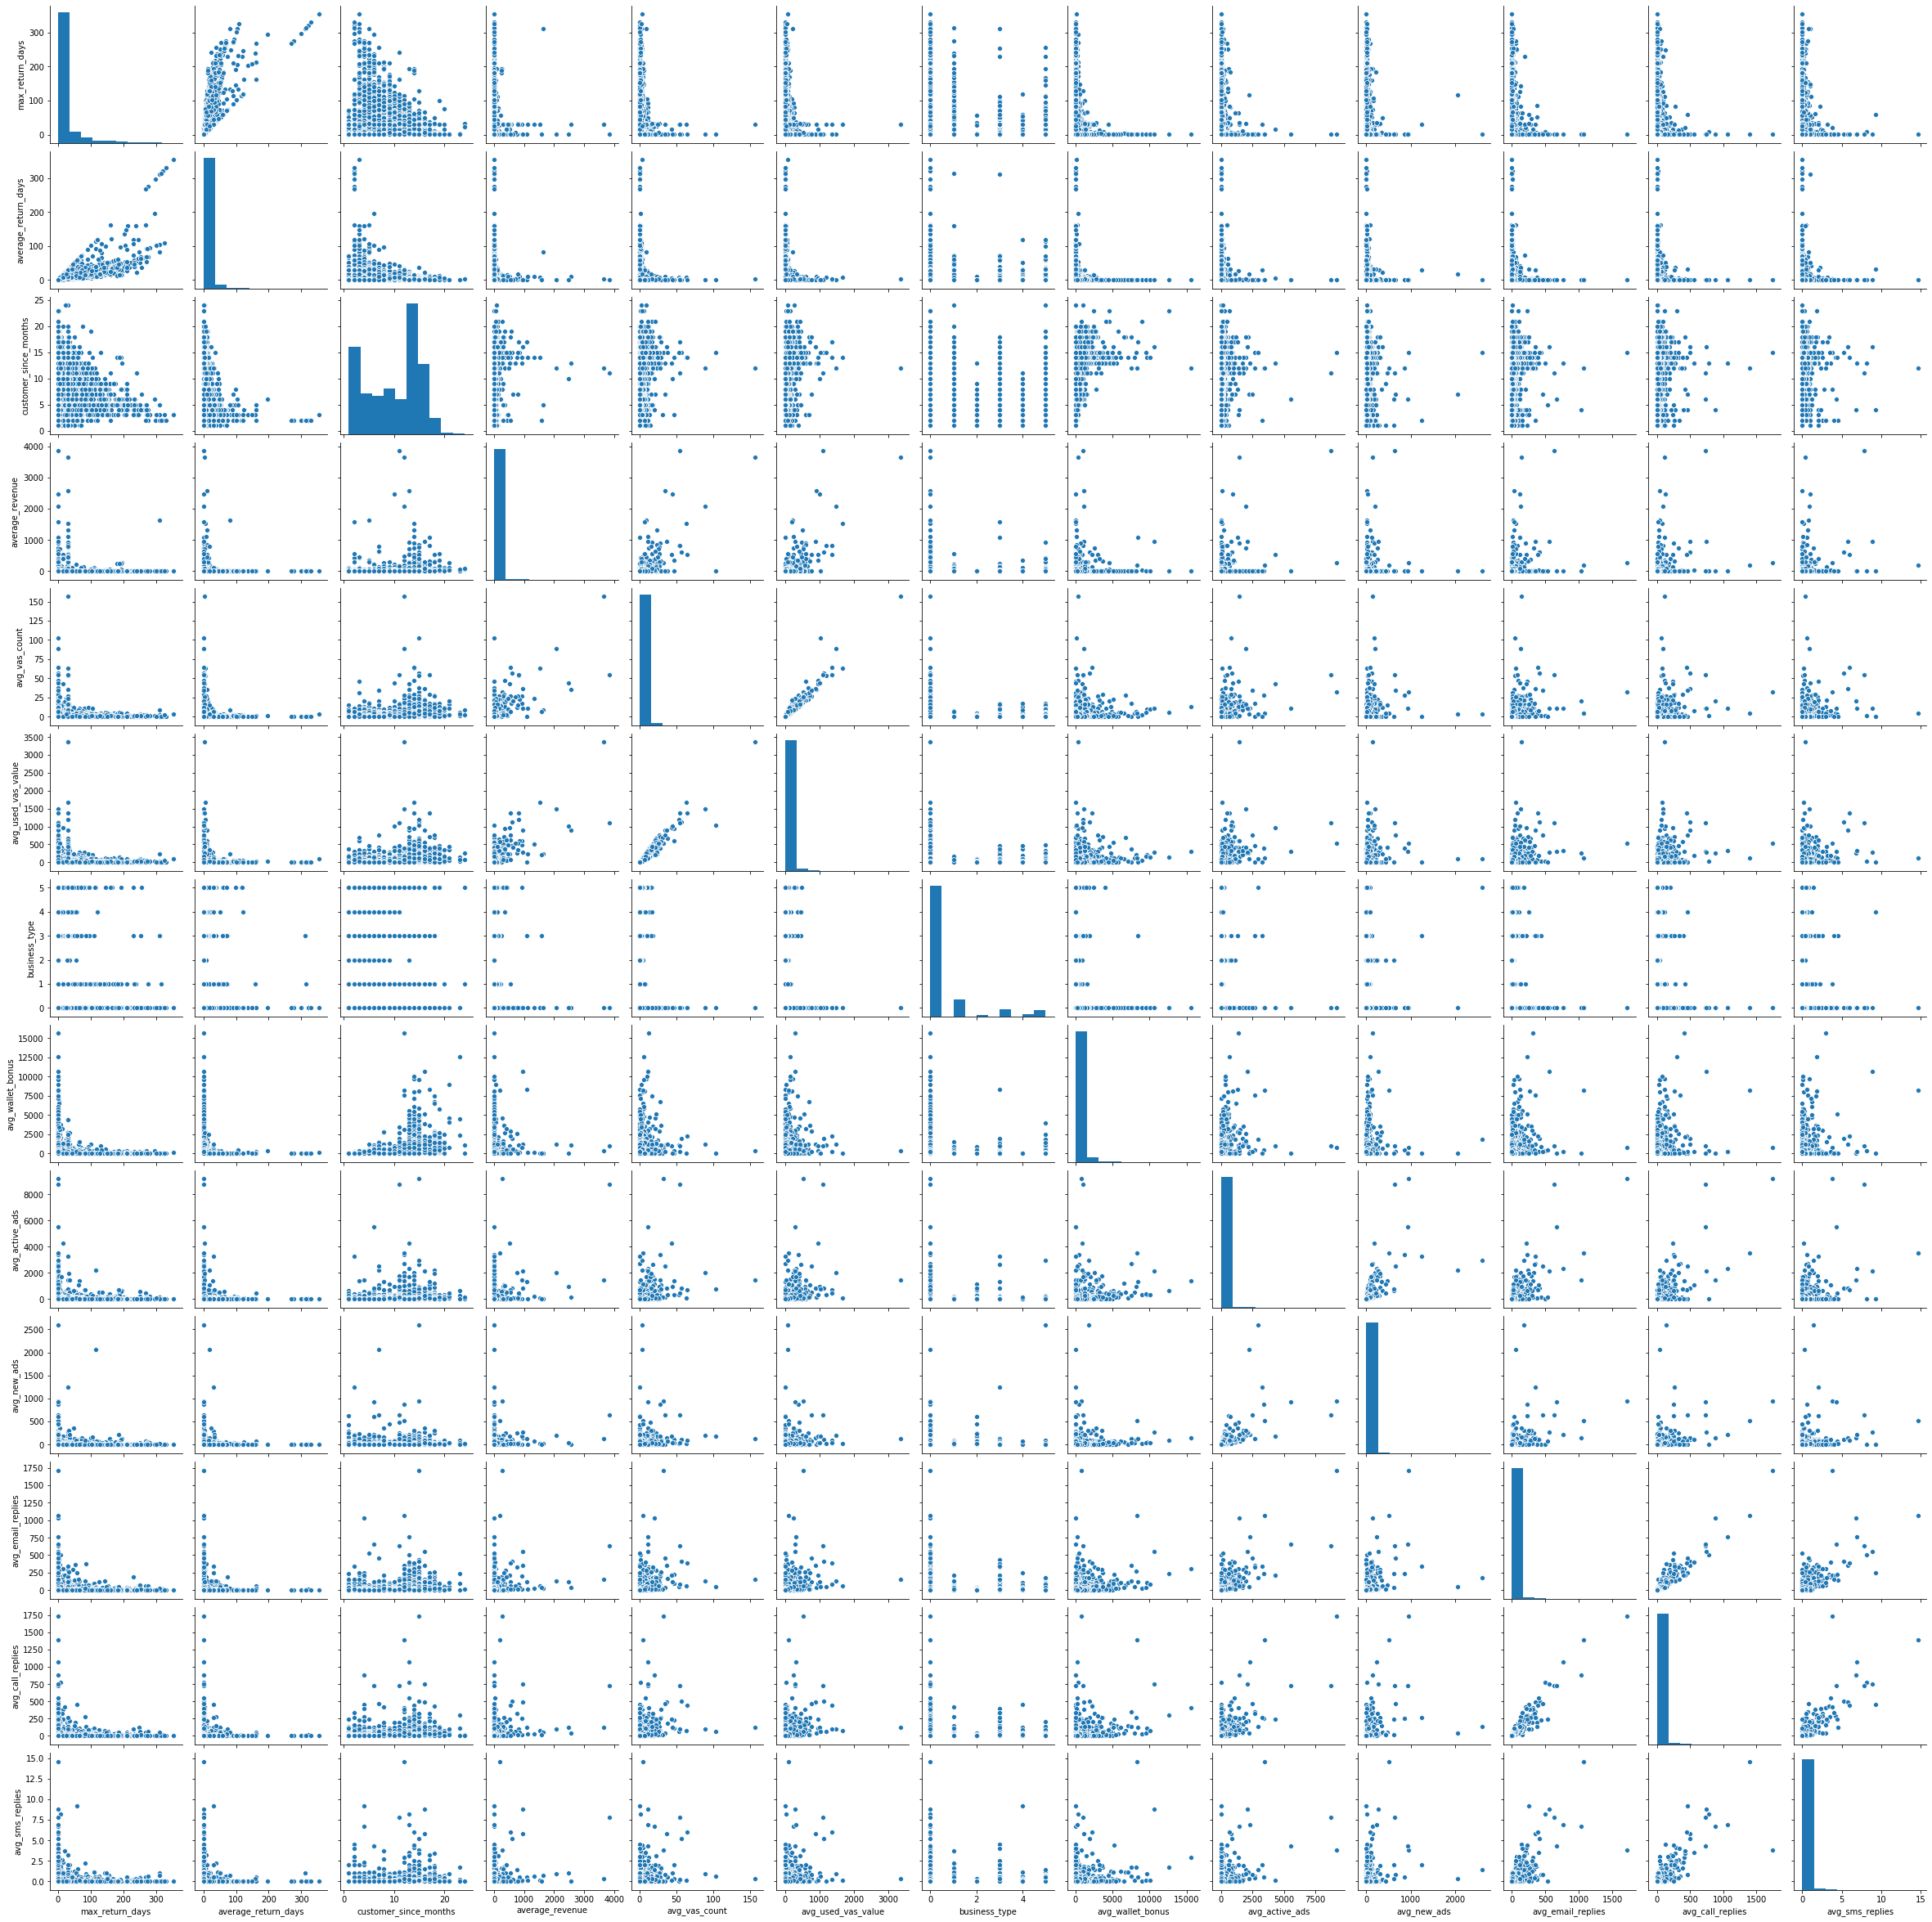

In [14]:
sns.pairplot(X)

<Figure size 432x288 with 0 Axes>

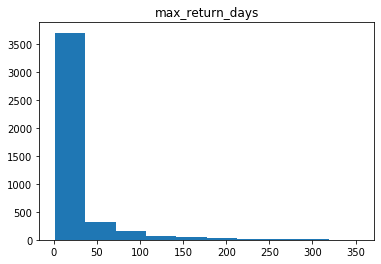

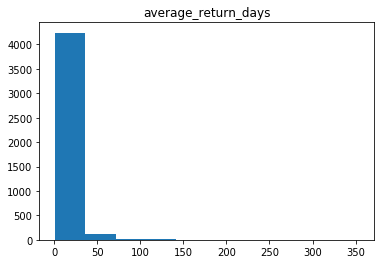

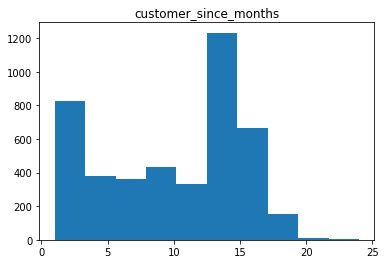

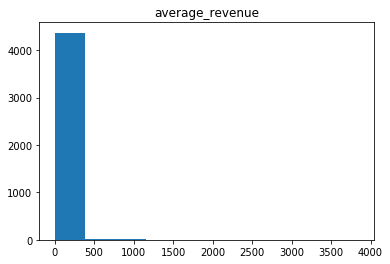

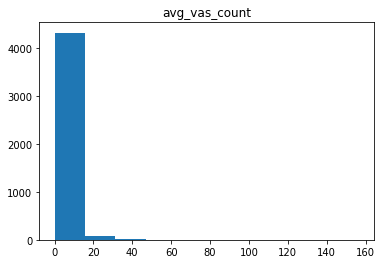

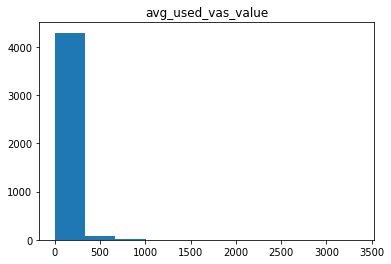

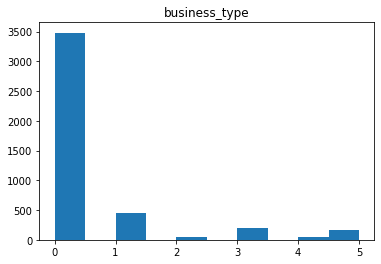

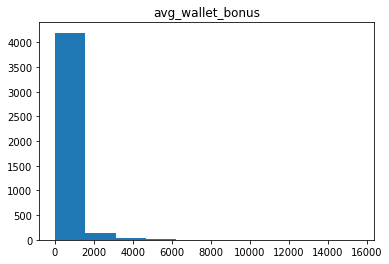

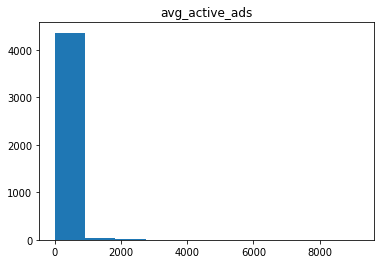

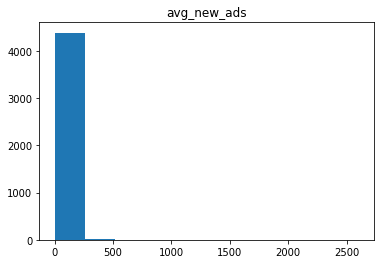

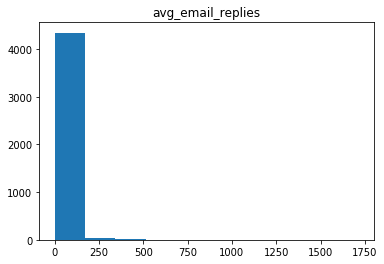

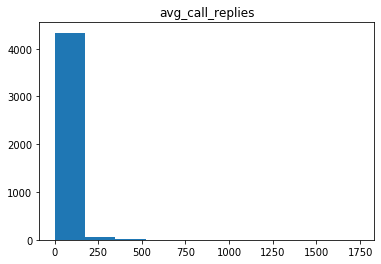

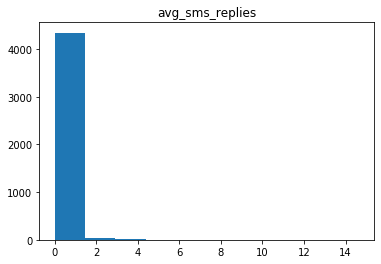

In [15]:
# Histogram of all features
for idx,column in enumerate(X.columns): 
    plt.figure(idx)
    X.hist(column=column,grid=False)

<Figure size 432x288 with 0 Axes>

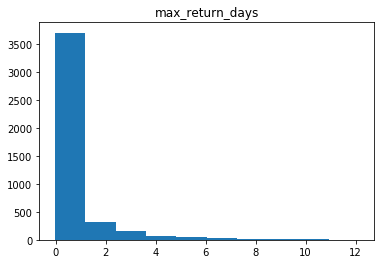

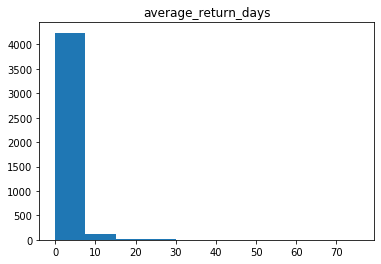

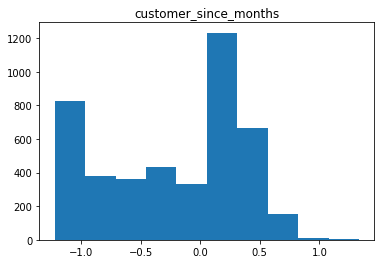

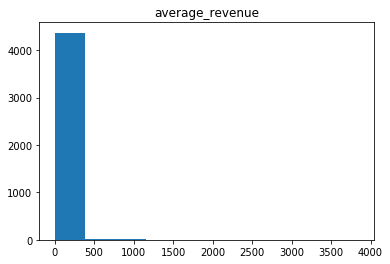

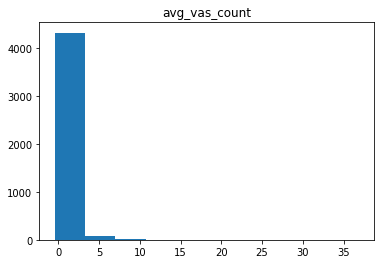

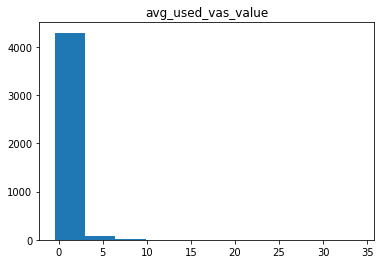

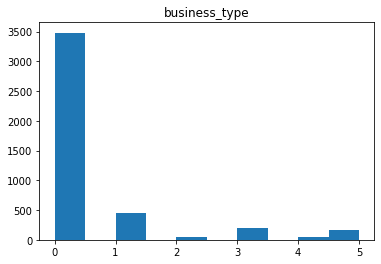

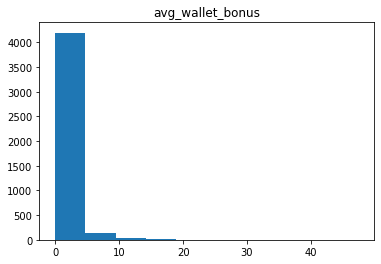

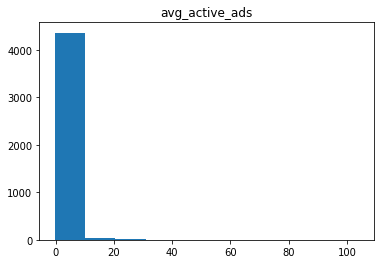

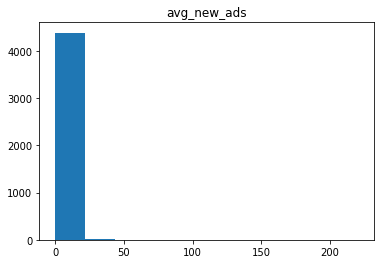

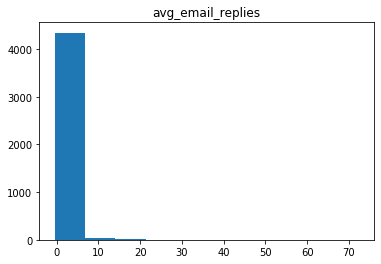

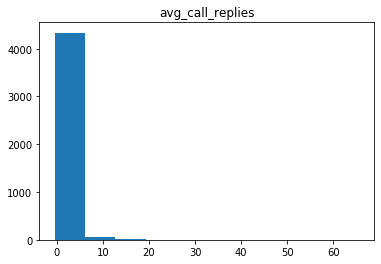

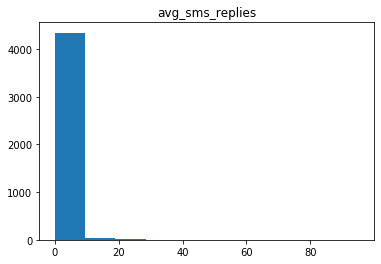

In [16]:
# Scaling all features
X_copy = X.copy()
rc = RobustScaler()
X_rc=rc.fit_transform(X_copy)
X_rc=pd.DataFrame(X_rc,columns=X.columns)

for idx,column in enumerate(X_rc.columns):
    plt.figure(idx)
    X_rc.hist(column=column,grid=False)

In [17]:
X.head()

,max_return_days,average_return_days,customer_since_months,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies
0,8,1.500000,14,0.0,3.666667,66.666667,0,300.0,79.333333,15.250000,32.416667,27.916667,0.250000
1,37,8.200000,10,0.0,4.900000,114.000000,0,0.0,232.100000,18.300000,16.200000,13.800000,0.000000
2,9,1.533333,15,0.0,5.333333,106.666667,0,150.0,55.083333,3.750000,20.250000,24.500000,0.000000
3,1,1.000000,14,0.0,6.307692,176.153846,0,1481.0,409.538462,80.769231,87.461538,57.615385,0.000000
4,1,1.000000,18,0.0,5.846154,109.230769,0,41.5,48.230769,1.692308,17.461538,25.769231,0.230769


# Random Forest with all features

In [18]:
from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [19]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X_rc,Y,test_size=.2)

In [20]:
clf = RandomForestClassifier(max_depth=17, random_state=0)
clf.fit(X_train, y_train)
y_pred1 = clf.predict(X_test)

In [21]:
accuracy_score(y_test, y_pred1)


0.9024943310657596

In [22]:
roc_auc_score(y_test, y_pred1)


0.6048849104859335

# Finding Important Features then Removing from Dataframe


In [23]:
from sklearn import svm
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
list_one =[]
feature_ranking = SelectKBest(chi2, k=5)
fit = feature_ranking.fit(X, Y)

fmt = '%-8s%-20s%s'

for i, (score, feature) in enumerate(zip(feature_ranking.scores_, X.columns)):
    list_one.append((score, feature))
    
dfObj = pd.DataFrame(list_one) 
dfObj.sort_values(by=[0], ascending = False)

,0,1
7,53075.838893,avg_wallet_bonus
0,28348.311485,max_return_days
5,13807.374840,avg_used_vas_value
1,6225.394166,average_return_days
11,3370.135371,avg_call_replies
3,2750.353403,average_revenue
10,2626.987388,avg_email_replies
8,1902.918177,avg_active_ads
2,658.416190,customer_since_months
4,565.111904,avg_vas_count


In [24]:
X_rc.drop(['business_type','avg_sms_replies'],axis=1,inplace=True)

In [25]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_rc,Y,test_size=.2)


In [26]:
clf1 = RandomForestClassifier(n_estimators= 200, max_depth = 30 )
clf1.fit(X_train1, y_train1)
y_pred2 = clf1.predict(X_test1) #Random Forest Classifier with Feature Selection Dataframe

In [27]:
accuracy_score(y_test1, y_pred2)


0.9115646258503401

In [28]:
roc_auc_score(y_test1, y_pred2)


0.6079850197284826

# XGBoost Classifier with Feature Selection Dataframe


In [29]:
#pip install xgboost

In [30]:
import xgboost as xgb
from xgboost import XGBClassifier

In [31]:
model = XGBClassifier(learning_rate = 0.1, n_estimators=150, min_child_weight=3,  max_depth=13)
model.fit(X_train1, y_train1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=13,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
y_pred3 = model.predict(X_test1)


In [33]:
accuracy_score(y_test1, y_pred3)


0.909297052154195

In [34]:
roc_auc_score(y_test1, y_pred3)


0.6715040460108339

# SHAP variable importance plot

In [35]:
import shap
import xgboost

In [36]:
shap.initjs()

In [37]:
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=Y), 100) # train XGBoost model

In [38]:
explainer = shap.TreeExplainer(model) # explain the model's predictions using SHAP

In [39]:
shap_values = explainer.shap_values(X)

In [40]:
# visualize the first prediction
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [ ]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, X)

shap.plots.force is slow for many thousands of rows, try subsampling your data.


In [ ]:
# create a dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("customer_since_months", shap_values, X)

In [ ]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X)

In [ ]:
#std Bar Plot
shap.summary_plot(shap_values, X, plot_type="bar")